# Lab 1, COMP3014J, Random Numbers


This Lab is a jupyter notebook which allows you to directly interact with
the code so that you can see the effect of any changes you may like to make.

Author: Nima Afraz, UCD

Step 1: We import two libraries. 
1- Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

2- NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from numpy.random import random
from numpy import pi

Step 2: Plot the Monte Carlo Experiment


Pi is approximately 3.124

This is -0.56% off the true value.



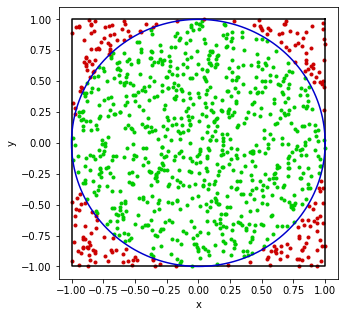

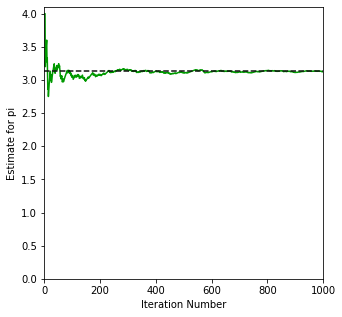

In [4]:
# print(os.listdir("../input"))
def MonteCarloPi(maxIterations):
    # Draw a square and a circle to frame out simulation
    squareX = [1, -1, -1, 1, 1]
    squareY = [1, 1, -1, -1, 1]
    circleX, circleY = [], []

    for i in range(361):
        circleX.append(np.cos(np.pi * i / 180))
        circleY.append(np.sin(np.pi * i / 180))

    # Start keeping track of values we're interested in
    insideX, insideY, outsideX, outsideY, Iteration, CurrentPi = [], [], [], [], [], []
    insideCounter = 0

    # Generate a bunch of values of x and y between -1 and 1, then assess their combined radius on an xy plane
    for i in range(maxIterations):
        x = 2 * (random() - 0.5)
        y = 2 * (random() - 0.5)
        r = np.sqrt(x ** 2 + y ** 2)
        Iteration.append(i)
        if r <= 1:
            insideCounter += 1
            insideX.append(x)
            insideY.append(y)
        else:
            outsideX.append(x)
            outsideY.append(y)
        CurrentPi.append(4 * insideCounter / (i + 1))

    removal = 0
    # print(CurrentPi)
    CurrentPi= CurrentPi[removal:]
    # print(CurrentPi[3:])


    piValue = 4 * insideCounter / maxIterations
    piError = round(100 * ((piValue - pi) / pi), 4)
    # print out our final estimate and how it compares to the true value
    print('\n' + f'Pi is approximately {piValue}\n')
    print(f'This is {piError}% off the true value.\n')

    # Draw a 2D plot of where our iterations landed compared to the square and circle
    rcParams['figure.figsize'] = 5, 5
    plt.plot(squareX, squareY, color='#000000')
    plt.plot(circleX, circleY, color='#0000CC')
    plt.scatter(insideX, insideY, color='#00CC00', marker=".")
    plt.scatter(outsideX, outsideY, color='#CC0000', marker=".")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    # Draw a psuedo-time series plot of current estimate of pi vs. iteration number
    plt.plot(Iteration[removal:], CurrentPi, color='#009900')
    plt.axhline(y=pi, color='#0F0F0F', ls='--')
    plt.axis([0, maxIterations, 0, 4.1])
    plt.xlabel('Iteration Number')
    plt.ylabel('Estimate for pi')
    plt.show()



MonteCarloPi(1000)